In [1]:
import sympy as sym
sym.init_printing()
%matplotlib inline

from pole_zero_plot import pole_zero_plot


## Definición


La [transformada $z$](https://en.wikipedia.org/wiki/Z-transform) permite representar una señal discreta $x[k]$ en el dominio de las frecuencias. La función base para la transformación es $z^{-k}$ con $z \in \mathbb{C}$

### Transformada bilateral
La transformada $z$ bilateral se define como


\begin{equation}
X(z) = \sum_{k = -\infty}^{\infty} x[k] \, z^{-k}
\end{equation}

donde $X(z) = \mathcal{Z} \{ x[k] \}$ es la transformada Z de $x[k]$.

La variable $z$ puede ser interpretada como una [frecuencia compleja](../discrete_signals/standard_signals.ipynb#Complex-Exponential-Signal) $z = e^{\Sigma + j \Omega}$ con $\Sigma, \Omega \in \mathbb{R}$.

La existencia de $X(z) = \mathcal{Z} \{ x[k] \}$ depende de la señal $x[k]$ y los valores $z$. Los valores de $z$ que hacen que la transformada $z$ converja forman la ROC (región de convergencia).


La transformada inversa $z$ es:

\begin{equation}
x[k] = \frac{1}{2 \pi j} \int_{ }^{ } X(z) \, z^{k-1} \; dz
\end{equation}

### Transformada de un lado

En las señales causales se cumple que $x[k] = 0$ para $k <0$, por lo cual la transformada se convierte en:

\begin{equation}
X(z) = \sum_{k = -\infty}^{\infty} x[k] \cdot \epsilon[k] \, z^{-k} = \sum_{k = 0}^{\infty} x[k] \, z^{-k}
\end{equation}

\begin{equation}
X(z) = \sum_{k = 0}^{\infty} x[k] \, z^{-k}
\end{equation}

Así como la transformada de Laplace se usa para resolver ecuacioes diferenciales, la transforada $z$ se usa para resolver ecuaciones en diferencias.

### Señales de duración finita

Dada una señal $x[k]$ de duración finita, $x[k] = 0$ para $\{k : k < M_1 \wedge k \geq M_2\}$ con $M_1 < M_2$, por lo cual

\begin{equation}
\begin{split}
X(z) &= \sum_{k = -\infty}^{\infty} x[k] \cdot \, z^{-k} 
\\
&= \sum_{k=M_1}^{M_2 - 1} x[k] \, z^{-k}
\\
&= x[M_1] \, z^{-M_1} + x[M_1 + 1] \, z^{- (M_1 + 1)} + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\\
\end{split}
\end{equation}

La transformada $z$ de una señal de duración finita es un polinomio en $z$.

- Si la señal es causal, la ROC corresponde a $z \in \mathbb{C} \setminus \{ 0 \}$. 

\begin{equation}
X(z) = x[0] + x[1] \, z^{-1} + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

- Si la señal es anticausal, la ROC corresponde a $z \in \mathbb{C} \setminus \{ \infty \}$. 

\begin{equation}
X(z) = x[M_1] \, z^{(-M_1)}+ \dots + x[-2] \, z^{2} + x[-1] \, z^{1} + x[0]  
\end{equation}

- Si la señal tiene parte causal y parte anticausal, la ROC corresponde a $z \in \mathbb{C} \setminus \{ infty , 0 \}$. 

\begin{equation}
X(z) = x[M_1] \, z^{(M_1)} + \dots + x[0] + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}


### Transformada del delta de Dirac

\begin{equation}
\mathcal{Z} \{ \delta[k] \} = \sum_{k = -\infty}^{\infty} \delta[k] \, z^{-k} = 1
\end{equation}

para $z \in \mathbb{C}$. La ROC corresponde a todo el plano $z$.

Como $\mathcal{Z} \{ \delta[k] \} = 1$, todas las frecuencias están presentes en la señal con igual peso.


In [2]:


k = sym.symbols('k', integer=True)
z = sym.symbols('z', complex=True)

X = sym.summation(sym.KroneckerDelta(k, 0) * z**(-k), (k, -sym.oo, sym.oo))
X

### Transformada de un pulso causal

Suponga que $x[k] = \text{rect}_N[k]$ es una señal causal rectangular de duración $N$.

\begin{equation}
\begin{split}
\mathcal{Z} \{ \text{rect}_N[k] \} &= \sum_{k=0}^{N-1} z^{-k} 
\\ 
&= 1 + z^{-1} + \dots + z^{-(N - 1)}
\\
&= 1 + \frac{1}{z^{1}} + \dots + \frac{1}{z^{N-1}}
\\
\end{split}
\end{equation}

con $z \in \mathbb{C} \setminus \{ 0 \}$.

Observe que la sumatoria resultante puede reescribirse como

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] \} =  \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} & \text{for } z \neq 1 \\
N & \text{for } z = 1
\end{cases}
\end{equation}

### Transformada de una Exponencial Compleja y causal


La transformada $X(z) = \mathcal{Z} \{ x[k] \}$ de una señal exponencial compleja y causal


\begin{equation}
x[k] = \epsilon[k] \cdot z_0^k
\end{equation}

con frecuencia compleja $z_0 \in \mathbb{C}$ se obtiene de la expresión integral de la transfomada $z$


\begin{equation}
X(z) = \sum_{k=0}^{\infty} z_0^k \cdot z^{-k} = \sum_{k=0}^{\infty} \left( \frac{z_0}{z} \right)^k = \frac{z}{z - z_0}
\end{equation}

Lo anterior ya que la sumatoria resultante es una [serie geométrica](https://en.wikipedia.org/wiki/Geometric_series). Esta transformada converge si $\left| \frac{z_0}{z} \right| < 1$, es decir, la ROC es

\begin{equation}
|z| > |z_0|
\end{equation}

Así, la transformada $z$ de la señal causal exponencial compleja es:

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot z_0^k \} = \frac{z}{z - z_0} \qquad \text{for } |z| > |z_0|
\end{equation}


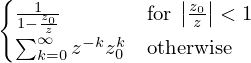

In [3]:
z0 = sym.symbols('z0')

X = sym.summation(z0**k * z**(-k), (k, 0, sym.oo))
X

## Convergencia

Teniendo en cuenta que la transformada $z$ es una serie infinita, es una condición necesaria pero no suficiente para su convergencia que las normas de los elementos que la conforman sean sumables.

\begin{equation}
\sum_{k = -\infty}^{\infty} | x[k] \cdot z^{- k} | = \sum_{k = -\infty}^{\infty} | x[k] | \cdot | z |^{- k}  < \infty
\end{equation}

Observe que la ROC se determina entonces por los valores de $|z|$, por lo cual se generan "anillos" en el plano $z$ que pueden incluir $z=0$ o $z=\infty$. Como $z = e^{\Sigma} \cdot e^{j \Omega}$, la fase $\Omega$ de $z$ no tiene efectos sobre la convergencia.

Puede observarse que la transformada $z$ de la exponencial compleja y causal tiene una ROC en forma de $|z| > z_0$. En términos generales, las ROC se grafican a continuación.


![ROCs](figuras/ROC.png)



## Transformada de Laplace de una señal muestreada

Suponga una señal muestreada $x_\text{s}(t)$,

\begin{equation}
x_\text{s}(t) = \sum_{k = -\infty}^{\infty} x(k T) \cdot \delta(t - k T) = \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T)
\end{equation}

donde $x(t)$ es una señal de tiempo continuo y $T$ el periodo de muestreo.

La transformada de Laplace de una señal muestreada es:

\begin{equation}
X_\text{s}(s) = \int_{-\infty}^{\infty} \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T) \, e^{- s t} \; dt = \sum_{k = -\infty}^{\infty} x[k] \, e^{-s k T}
\end{equation}

Comparando la transformada de Laplace de una señal muestreada con la transformada $z$.

| Transformada $z$ | Transformada de Laplace |
|------------------|-------------------------|
|\begin{equation} X(z) = \sum_{k = -\infty}^{\infty} x[k] \, z^{-k} \end{equation} | \begin{equation} X_\text{s}(s) = \sum_{k = -\infty}^{\infty} x[k] \, e^{-s k T} \end{equation} |

Se observa que $X(z) = X_\text{s}(s)$ si $z^{-k} = e^{-s k T}$, es decir:

\begin{equation}
X_\text{s}(s) = X(z) \big\rvert_{z = e^{s T}}
\end{equation}

Esto implica que la representación frecuencial de la señal muestreada $X_\text{s}(s)$ es equivalente a la transformada $z$  de la señal discreta $X(z)$ con $z = e^{s T}$.

Un mapeo entre el plano $s$ y el plano $z$ se muestra a continuación.

![Mapping of the $s$-plane onto the $z$-plane](figuras/mapping_s_z_plane.png)


## Mapas de polos y ceros

Como la transformada $z$ $X(z) = \mathcal{Z} \{ x[k] \}$ es una función compleja que depende de la variable compleja $z \in \mathbb{C}$, puede representarse con su magnitud $|X(z)|$ y fase $\varphi(z)$ (representación polar) o como sus partes real $\Re \{ X(z) \}$ e imaginaria $\Im \{ X(z) \}$ en el plano $z$ (representación cartesiana).

Al igual que con la transformada de Laplace, la transformada $z$ de varias señales o sistemas puede representarse como fracciones entre polinomios. Como los polinomios se pueden representar desde sus raíces, también las transformadas $z$. Las raices del numerador son llamadas *ceros* y las del denominador *polos* de $X(z)$.


\begin{equation}
X(z) = \frac{\sum_{m=0}^{M} \beta_m \, z^{-m}}{\sum_{n=0}^{N} \alpha_n \, z^{-n}} = K \cdot \frac{\prod_{\mu=0}^{Q} (z - z_{0 \mu})}{\prod_{\nu=0}^{P} (z - z_{\infty \nu})}
\end{equation}

Es frecuente ilustrar los polos y ceros en un [diagrama de polos y ceros](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot). El círculo unitario es relevante en aplicaciones de señales y control.

![Exemplary pole-zero plot](figuras/pz_plot.png)

La ubicación de los polos y ceros permiten interpretar la composición de la señal. Por ejemplo, la transformada  $z$ de una [señal exponencial compleja](#Transformation-of-the-Causal-Complex-Exponential-Signal) tiene un cero en $z=0$ y un polo en  $z = z_0$. Si una señal es combinación lineal de exponenciales, habrá varios polos con ubicaciones en las frecuencias de cada señal.

## Propiedades

Dadas las propiedades presentadas para la transformada de Fourier y la estructura de las transformadas de Laplace y de Fourier, se obtienen las mismas propiedades.

### Invertible
\begin{equation}
x[k] = \mathcal{Z}^{-1} \left\{ \mathcal{Z} \{ x[k] \} \right\}
\end{equation}


### Linealidad

\begin{equation}
\mathcal{Z} \{ A \cdot x_1[k] + B \cdot x_2[k] \} = A \cdot X_1(z) + B \cdot X_2(z)
\end{equation}


**Ejemplo - Transformada $z$ de una señal senoidal causal**


\begin{equation}
x[k] = sin( \Omega _0 t) \cdot \epsilon [k]
\end{equation}

con $\Omega _0 \in \mathbb{R}^+$

De acuerdo con las expresiones de Euler:
\begin{align}
\cos(\Omega_0 k) &= \frac{1}{2} \left( e^{j \Omega_0 k} + e^{-j \Omega_0 k} \right) \\
\sin(\Omega_0 k) &= \frac{1}{2j} \left( e^{j \Omega_0 k} - e^{-j \Omega_0 k} \right)
\end{align}

Así, la transformada de $sin( \Omega _0 k)$ debe ser igual a la de $\frac{1}{2j} ( e^{j \Omega_0 k} - e^{-j \Omega_0 k})$.

Dado que la transformada $z$ de una exponencial compleja decreciente y causal es :

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot z_0^{k} \} = \frac{z}{z - z_0}
\end{equation}

Entonces:

\begin{equation}
\mathcal{Z} \{ sin( \Omega _0 t) \} = \frac{1}{2j} \left( \frac{z}{z - e^{j \Omega_0}} - \frac{z}{z - e^{-j \Omega_0}} \right) = \frac{z \sin(\Omega_0)}{z^2 - 2z\cos(\Omega_0) + 1}
\end{equation}

ROC $|z|>1$

Aplicando el mismo razonamiento puede encontrarse la transformada del coseno.

Se define la señal en tiempo discreto

In [4]:

k = sym.symbols('k', integer=True)
W0 = sym.symbols('Omega0', real=True)
z = sym.symbols('z', complex=True)
x = sym.sin(W0 * k)*sym.Heaviside(k)
x

Se define la transformada $z$

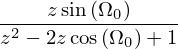

In [5]:
Xnum = z*sym.sin(W0)
Xden = z**2 - 2*z*sym.cos(W0) + 1
X = Xnum / Xden
X

Se encuentran los ceros

In [6]:
ceros = sym.roots(Xnum,z)
ceros

Se encuentran los polos

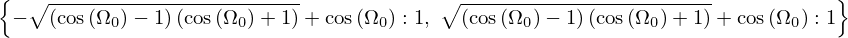

In [7]:
polos = sym.roots(Xden,z)
polos

se grafica el mapa de polos y ceros

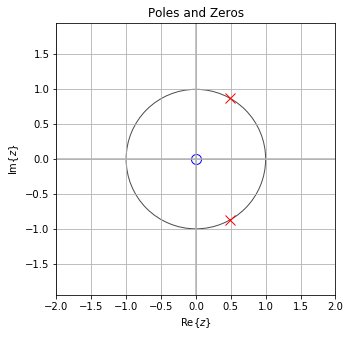

In [8]:
X2 = X.subs(W0,200)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

### Lista de propiedades

A continuación se listan propiedades y teoremas:

| &#65279;  | $x[k]$ | $X(z) = \mathcal{Z} \{ x[k] \}$ | Región de convergencia ROC |
|:---|:---:|:---:|:---:|
| Linealidad | $A \, x_1[k] + B \, x_2[k]$ | $A \, X_1(z) + B \, X_2(z)$ | $\supseteq ROC\{x_1\} \cap ROC\{x_2\}$ |
| Señales reales | $x[k] = x^*[k]$ | $X(z) = X^*(z^*)$ | | 
| Convolución | $x[k] * h[k]$ | $X(z) \cdot H(z)$ | $\supseteq \text{ROC}\{x[k]\} \cap \text{ROC}\{h(t)\}$ |
| Desplazamiento | $x[k - \kappa]$ | $z^{- \kappa} \cdot X(z)$ | $\text{ROC}\{x[k]\}$ |
| Modulación | $z_0^{k}\cdot x[k]$ | $X(\frac{z}{z_0})$ | $s: s - \Re \{s_0\} \in \text{ROC}\{x(t)\}$ |


donde $A, B, z_0 \in \mathbb{C}$, $a \in \mathbb{R} \setminus \{0\}$ y $\kappa \in \mathbb{R}$.

## Algunas transformadas $z$

A continuación se listan las transformadas $z$ de funciones usadas a menudo:

| $x[k]$                          | $X(z) = \mathcal{Z} \{ x[k] \}$ | Región de Convergencia ROC |
|:-------------------------------:|:-------------------------------:|:------------------------:|
| $\delta[k]$                     | $1$                             | $\mathbb{C}$             |
| $\epsilon[k]$                   | $\frac{z}{z-1}$                 | $|z| > 1$                |
| $k \epsilon[k]$                 | $\frac{z}{(z-1)^2}$             | $\|z| > 1$               |
| $z_0^{k} \epsilon[k]$           | $\frac{z}{z - z_0}$             | $|z| > |z_0|$            |
| $\sin(\Omega_0 k) \epsilon[k]$  | $\frac{z\sin(\Omega_0)}{z^2 + 2zcos(\Omega_0) + 1}$ | $|z|>1$ |
| $\cos(\Omega_0 k) \epsilon[k]$  | $\frac{z^2 - z\cos(\Omega_0)}{z^2 + 2zcos(\Omega_0) + 1}$ | $|z|>1$            |


## Función de transferencia

Al igual que con la transformada de Laplace, la transformada $z$ permite modelar sistemas LTI como funciones racionales entre polinomios.


**Ejemplo**

Suponga el siguiente modelo para un sistema de tiempo discreto cuya entrada es $x[k]$ y salida $y[k]$.

\begin{equation}
y[k] - y[k-1] + \frac{1}{2} y[k-2] = x[k]
\end{equation}

\begin{equation}
y[k] = y[k-1] - \frac{1}{2} y[k-2] + x[k]
\end{equation}


Aplicando la transformada $z$ a la ecuación se tiene

\begin{equation}
Y(z) - Y(z)z^{-1} + \frac{1}{2} Y(z)z^{-2} = X(z)
\end{equation}

Puede encontrarse una expresión para la salida en el dominio $z$ como

\begin{equation}
Y(z) = \frac{X(z)}{1 - z^{-1} + \frac{1}{2}z^{-2}}
\end{equation}

Así, la función de transferencia es:

\begin{equation}
H(z)= \frac{Y(z)}{X(z)} = \frac{1}{1 - z^{-1} + \frac{1}{2}z^{-2}}
\end{equation}


Para ilustrar, se grafica la respuesa frecuencial del sistema en tiempo discreto $H(e^{j \Omega}) = H(z) \vert_{z = e^{j \Omega}}$.

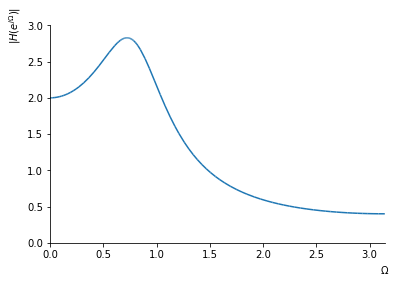

In [13]:
# define variables and transfer function
z = sym.symbols('z', complex=True)
W = sym.symbols('Omega', real=True)
H = 1 / (1 - z**(-1) + sym.Rational(1, 2)*z**(-2))

# plot transfer function
sym.plot(sym.Abs(H.subs(z, sym.exp(sym.I*W))), (W, -0*sym.pi, 1*sym.pi),
         ylim=(0, 3), xlabel=r'$\Omega$', ylabel=r'$|H(e^{j \Omega})|$')

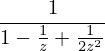

In [10]:
H

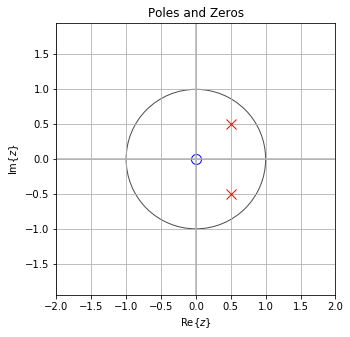

In [11]:
H1 = 2* z**2 / ((2* z**2) - (2*z) + 1)
pole_zero_plot(sym.roots(sym.denom(H1), z), sym.roots(sym.numer(H1), z))

Observe que la respuesta en frecuencia del sistema discreto es periódica.  

## Aproximaciones

Así como hay equivalencia entre los dominios $s$ y $z$, puede aproximarse la derivada de una función a partir de muestras. Analice la siguiente gráfica.


![derivadas](figuras/Derivative.png)

La razón de cambio aproximada a partir de las muestras en $x+h$ y en $x$ corresponde a $\frac{f(x+h)-f(x)}{h}$. Estas muestras están separadas por $h$.

En el caso de señales en tiempo discreto, la separación temporal entre muestras es $T_\text{s}$. Además, debido a restricciones de causalidad, se suele aproximar con información del pasado, por lo cual se hace la siguiente aproximación:

\begin{equation}
\frac{df}{dt}\big\rvert_{t = k \cdot T_\text{s}} \approx \frac{f[k]-f[k-1]}{T_\text{s}}
\end{equation}


$$x[k - \kappa]$$
$$z^{- \kappa} \cdot X(z)$$ 
$$\text{ROC}\{x[k]\}$$

$$\mathcal{L}\{\frac{df}{dt}\}\approx \mathcal{z}\{\frac{f[k] - f[k-1]}{T_s}\}$$

$$sF(s) \approx \frac{F(z)-z^{-1}F(z)}{T_s}$$

$$sF(s) \approx F(z)\frac{1-z^{-1}}{T_s}$$

In [19]:
s = sym.Symbol('s',complex = True)

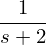

In [22]:
Tm = 0.01
Fs = 1/(s+2)
Fs

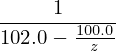

In [24]:
Fz = Fs.subs(s,(1-z**(-1))/Tm)
Fz

In [6]:
import numpy as np
(2/3)/(1/(1-np.exp(-3*0.02)))

0.038823644277167516

In [16]:
import sympy as sym
s = sym.Symbol('s')
((s+1)*(s+1)*(s+1)).expand()

s**3 + 3*s**2 + 3*s + 1

In [12]:
from scipy.signal import cont2discrete, lti, dlti, dstep

d_system = cont2discrete(([2],[1,3]), 0.02)
d_system

(array([[0.        , 0.03882364]]), array([ 1.        , -0.94176453]), 0.02)

In [2]:
1-0.9417645

0.058235499999999996

In [3]:
0.058235*2/3

0.038823333333333335

In [ ]:
0.038823